# Dow Jones Industrial Average (^DJI)

Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rata Die</a></span><ul class="toc-item"><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Draw Plots</a></span></li><li><span><a href="#set-the-original-value-column" data-toc-modified-id="set-the-original-value-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>set the original value column</a></span></li></ul></li><li><span><a href="#Extract-right-columns" data-toc-modified-id="Extract-right-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extract right columns</a></span></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quantize the values</a></span></li><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Insert averages to DataFrame</a></span></li></ul></div>

## Set Up

In [1]:
dataset_file_name = "^DJI.csv"
path_data_original = "./Data/original/"
date_original_format = "yyyy-mm-dd"
original_value_column = 4

include("MarketIndicators.jl") 
println()

## Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )
record_count = size(df)[1]
println("data dimentions: ", size(df) )

#using Statistics
#describe(df)

./Data/original/^DJI.csv
data dimentions: (9019, 7)


### Sample the data

In [3]:
#columns = preview_data(df) # uncomment to see the data
#println()

## Rata Die

In [4]:
col_ind = 1
insertcols!(df, col_ind, :Rata_Die => zeros(Int64, record_count); makeunique = true )

update_rata_die!(df, 1, 2)
#first(df, 6)

#columns = preview_data(df, 3)
println()

### Draw Plots

### set the original value column
- go back to the top "Setup" section and choose which column should be the "Orignal value"
- re-run the notebook

## Extract right columns

In [5]:
using DataFrames
df = DataFrame( Day      = df[:,1],                     # 1 
                Date     = df[:,2],,                    # 2 
                Value    = df[:,original_value_column], # 3 
                Original = df[:,original_value_column]  # 4 
               )

#columns = preview_data(df)
println()

LoadError: syntax: unexpected ","

## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU

In [6]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -0.044108256702957135
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 1243.709961
maximum = 29440.470703
Save these values for later to run model preditions
7×8 DataFrame
│ Row │ Rata_Die │ Date       │ Open    │ High    │ Low     │ Close   │
│     │ Int64    │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 724670   │ 1985-01-29 │ -128.0  │ 1295.49 │ 1266.89 │ 1292.62 │
│ 2   │ 726842   │ 1991-01-10 │ -117.0  │ 2512.13 │ 2467.08 │ 2498.76 │
│ 3   │ 729011   │ 1996-12-18 │ -82.0   │ 6356.77 │ 6308.33 │ 6346.77 │
│ 4   │ 731194   │ 2002-12-10 │ -63.0   │ 8578.99 │ 8469.55 │ 8574.26 │
│ 5   │ 733374   │ 2008-11-28 │ -60.0   │ 8831.35 │ 8672.69 │ 8829.04 │
│ 6   │ 735555   │ 2014-11-18 │ 20.0    │ 17735.7 │ 17642.0 │ 17687.8 │
│ 7   │ 737735   │ 2020-11-06 │ 118.0   │ 28432.0 │ 28189.5 │ 28323.4 │

│ Row │ Adj Close │ Volume    │
│     │ Float64   │ 

# Fill in Empty Dates

In [7]:
populate_missing_dates!(df)

ArgumentError: ArgumentError: Length of `row` does not match `DataFrame` column count.

In [8]:
df = sort(df, [:Day]);
count = size(df)[1]
first(df, 6)
# columns = preview_data(df)
println()

ArgumentError: ArgumentError: column name :Day not found in the data frame; existing most similar names are: :Date

# Averages

In [9]:
column_to_average = 3
averages005 = calculate_average(df, 5,   column_to_average )
averages030 = calculate_average(df, 30,  column_to_average )
averages090 = calculate_average(df, 90,  column_to_average )
averages180 = calculate_average(df, 180, column_to_average )
averages365 = calculate_average(df, 365, column_to_average )
println()

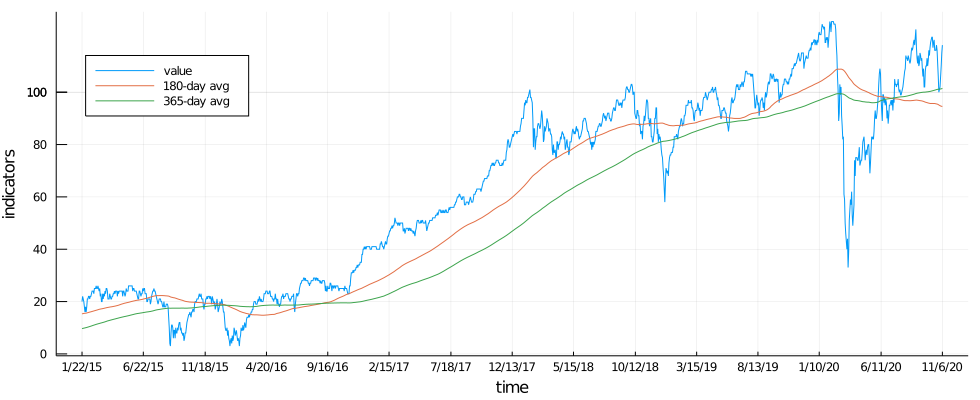

In [10]:
using Plots
columns = names(df)
count = size(df)[1]
days_back = 365*4
rows = count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3] averages180[rows] averages365[rows]    ], # y-axis
    label    = [ "value" "180-day avg" "365-day avg"   ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Insert averages to DataFrame

In [11]:
insertcols!(df, 5,  :Avg005   => averages005  , makeunique=true)
insertcols!(df, 6,  :Avg030   => averages030  , makeunique=true)
insertcols!(df, 7,  :Avg090   => averages090  , makeunique=true)
insertcols!(df, 8,  :Avg180   => averages180  , makeunique=true)
insertcols!(df, 9,  :Avg365   => averages365  , makeunique=true)

using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,731197.0,724670,731194.0,737735,,,Int64
2,Date,,1985-01-29,,2020-11-06,9019,,Date
3,Open,-46.7983,-128.0,-48.0,127.0,,,Float64
4,High,10286.0,1251.21,10185.8,29568.6,,,Float64
5,Avg005,-46.7953,-128.0,-47.8,126.8,,,Float64
6,Avg030,-46.7734,-128.0,-47.3,123.53,,,Float64
7,Avg090,-46.7201,-127.86,-47.07,116.13,,,Float64
8,Avg180,-46.5624,-127.46,-46.81,108.83,,,Float64
9,Avg365,-46.2872,-125.82,-46.92,101.44,,,Float64


# Position on given Date

In [12]:
position_column = position_on_date(df, "2020-09-30")
position_column[1:3]

3-element Array{Float64,1}:
 110.0
 110.0
 110.0

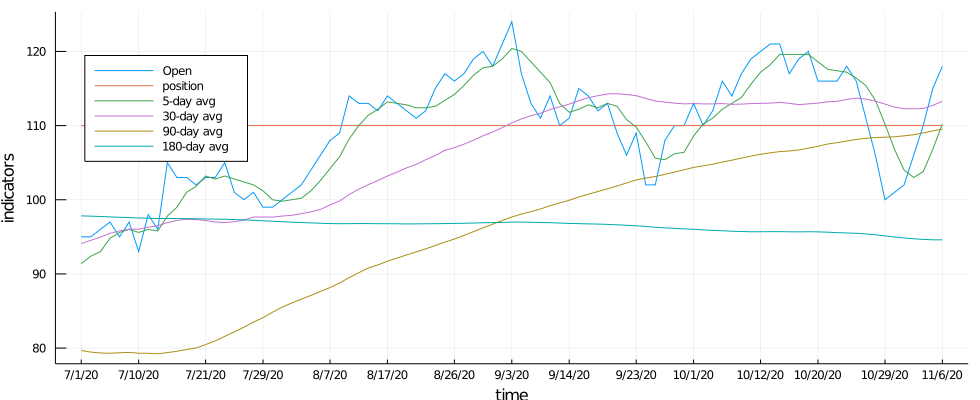

In [13]:
using Plots
count = size(df)[1]
days_back = 90
rows = count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(   dates, # x-axis: dates
        [  df[rows,3] position_column[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] 
        ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg"  ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [14]:
save_dataset(df, dataset_file_name );